### Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv('train.csv',sep=',')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dimensions of this data

In [58]:
shape=data.shape
print("dataset shape:",shape)

dataset shape: (891, 12)


###  Num of features

In [59]:

print("num of features:",len(data.columns))

num of features: 12


### Output data type

In [60]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Does it have nulls?

In [61]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Does it have duplicate values?

In [3]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Does it have outliers?

<AxesSubplot:xlabel='Sex', ylabel='Age'>

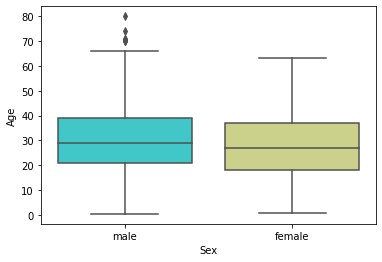

In [12]:
sns.boxplot(x="Sex",y="Age", data=data,palette="rainbow")


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

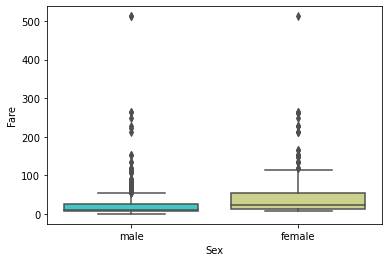

In [13]:
    sns.boxplot(x="Sex",y="Fare", data=data,palette="rainbow")


### EDA with visualizations to investigate the data

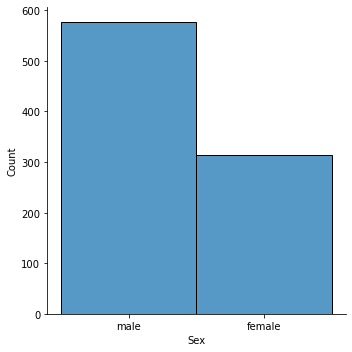

In [28]:
sns.displot(data['Sex'],kde=False,bins=30)

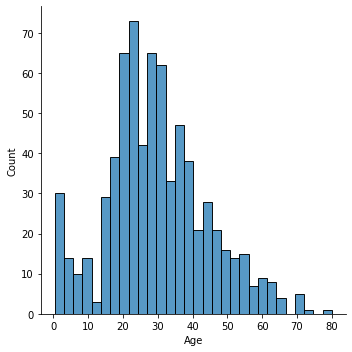

In [29]:
sns.displot(data['Age'],kde=False,bins=30)

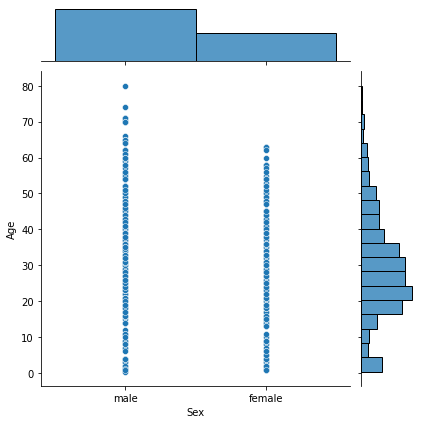

In [30]:
sns.jointplot(x='Sex',y='Age',data=data,kind='scatter')

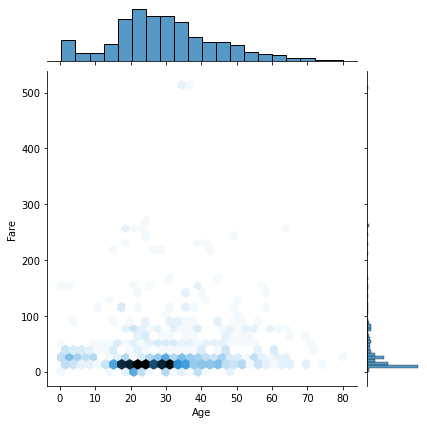

In [33]:
sns.jointplot(x='Age',y='Fare',data=data,kind='hex')

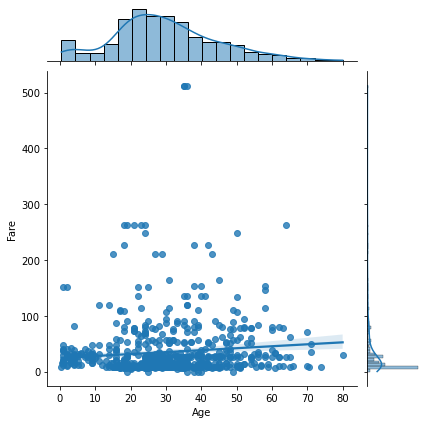

In [34]:
sns.jointplot(x='Age',y='Fare',data=data,kind='reg')

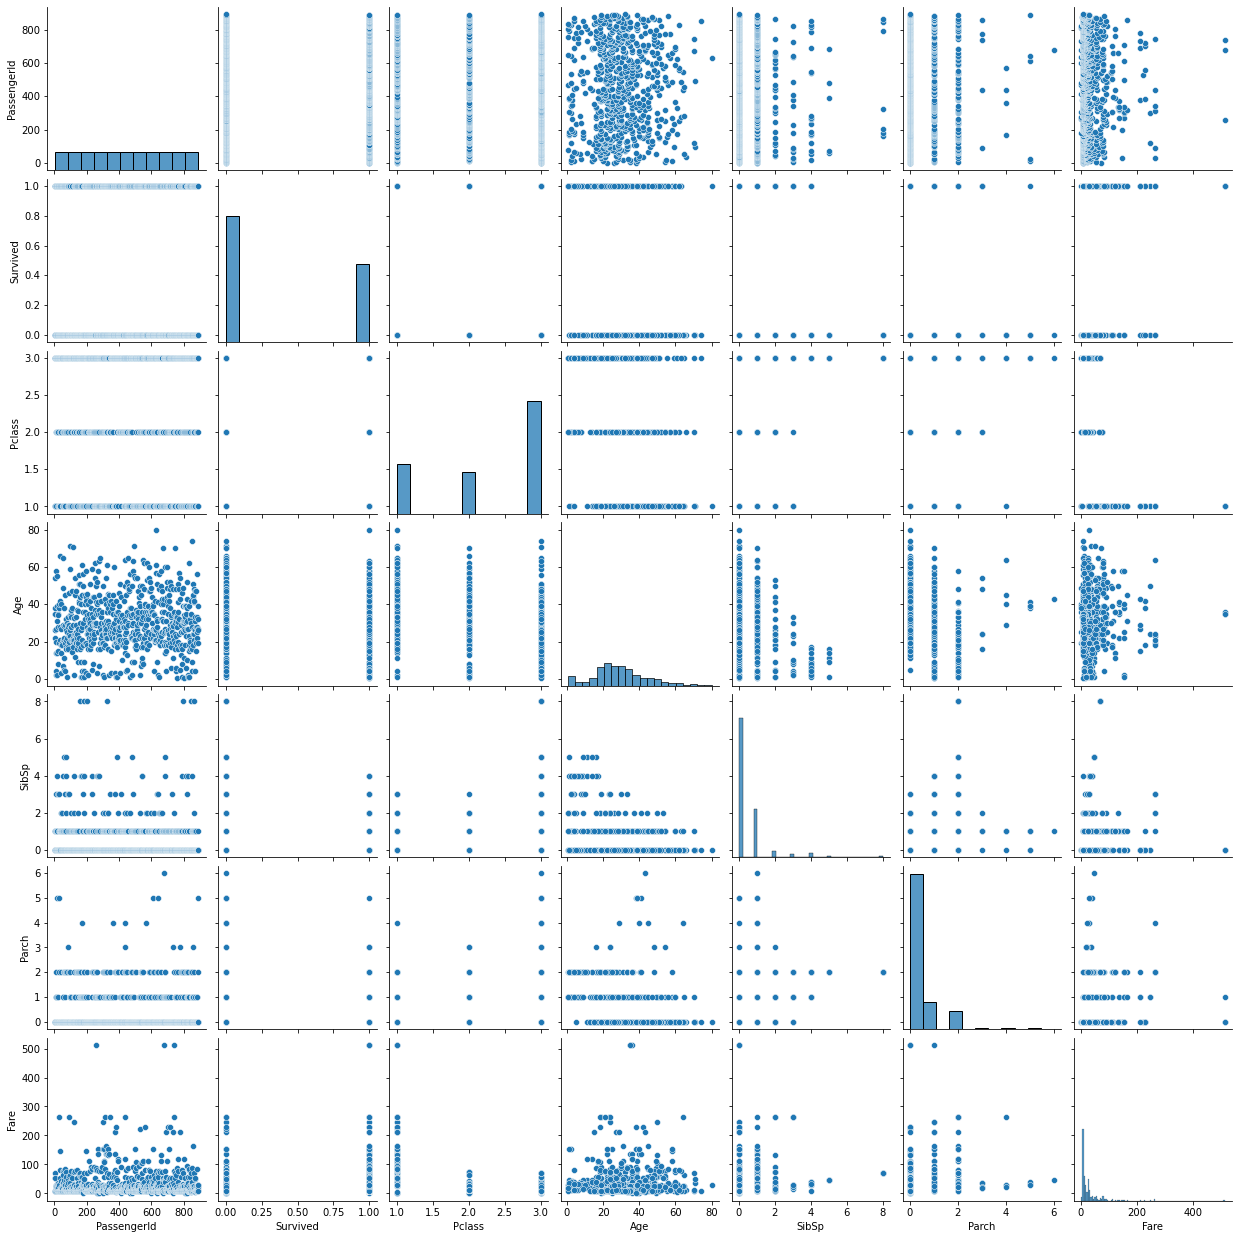

In [36]:
sns.pairplot(data)

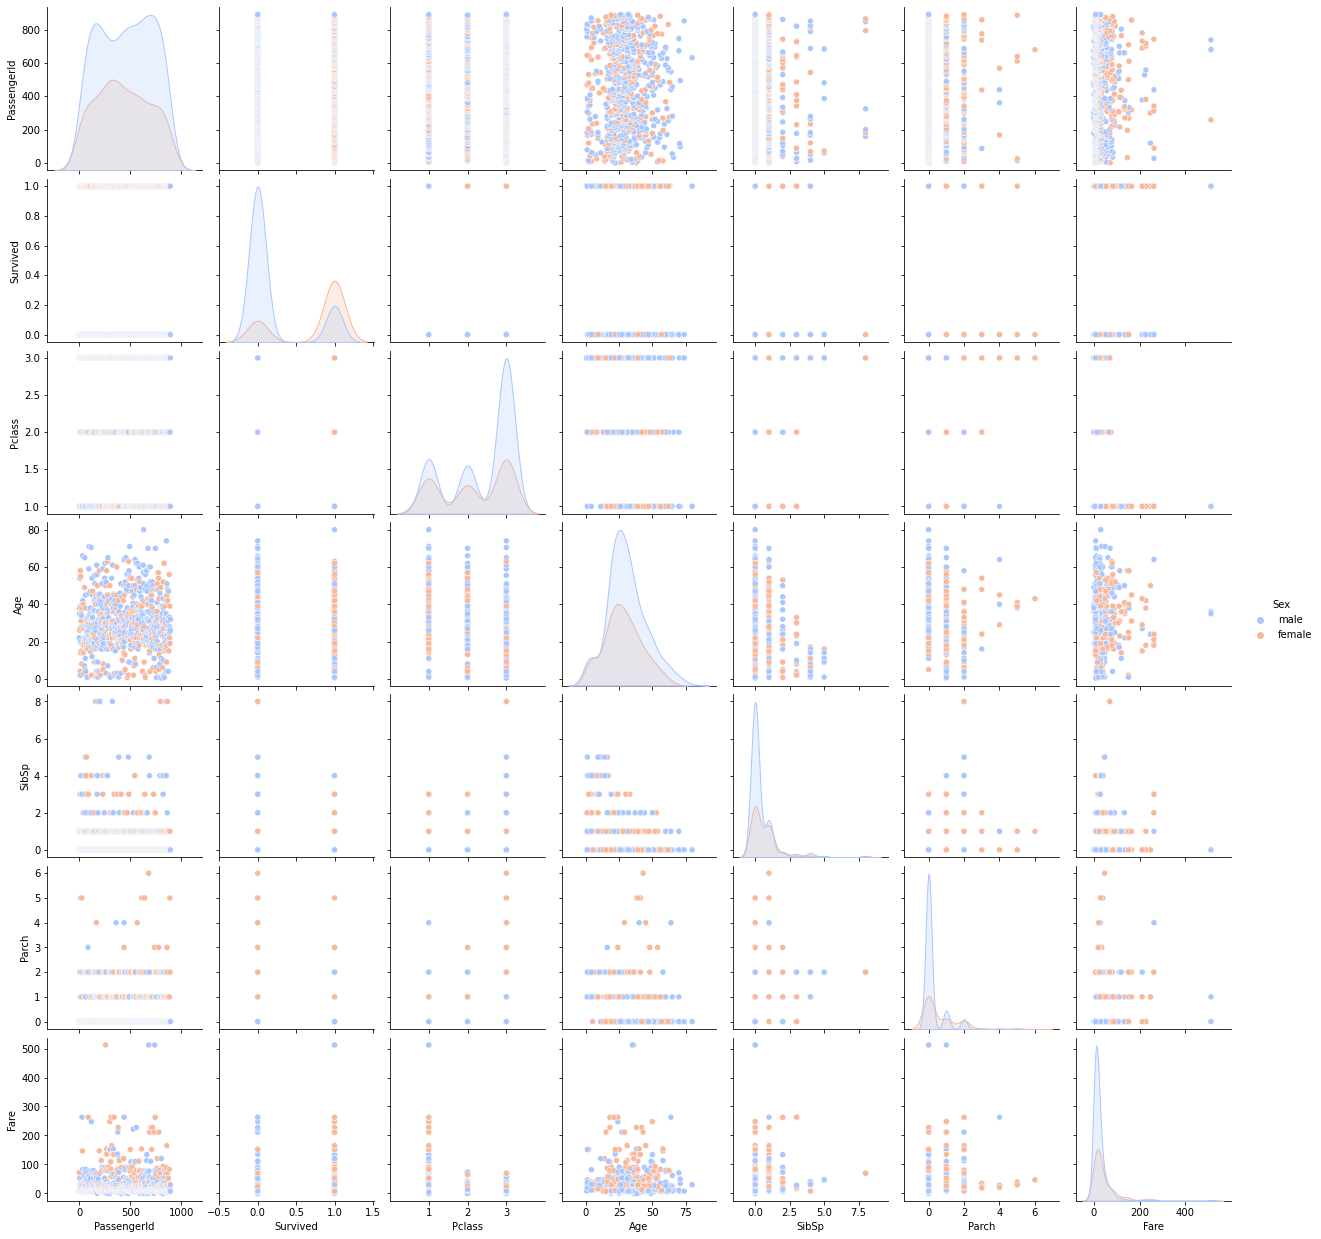

In [37]:
sns.pairplot(data,hue='Sex',palette='coolwarm')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

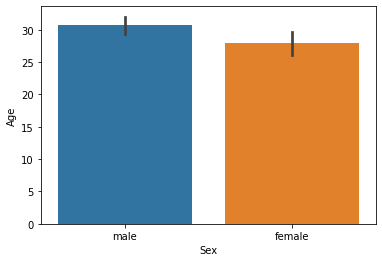

In [40]:
sns.barplot(x='Sex',y='Age',data=data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

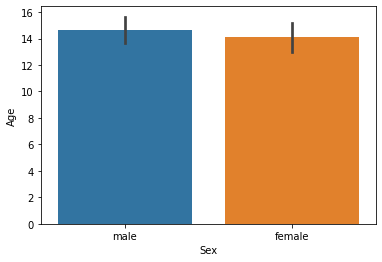

In [41]:
sns.barplot(x='Sex',y='Age',data=data,estimator=np.std)

<AxesSubplot:xlabel='Sex', ylabel='count'>

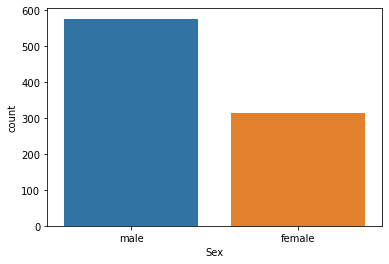

In [42]:
sns.countplot(x='Sex',data=data)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

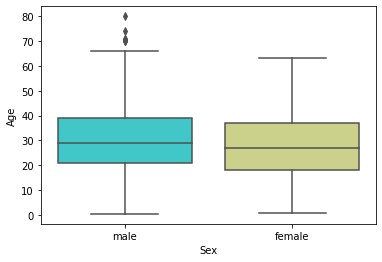

In [43]:
sns.boxplot(x='Sex',y='Age',data=data,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

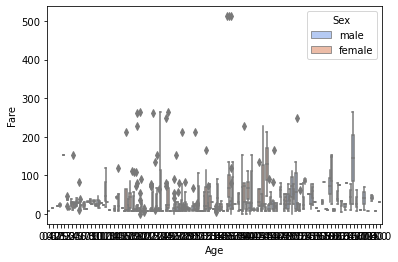

In [50]:
sns.boxplot(x='Age',y='Fare',hue="Sex",data=data,palette="coolwarm")

<AxesSubplot:>

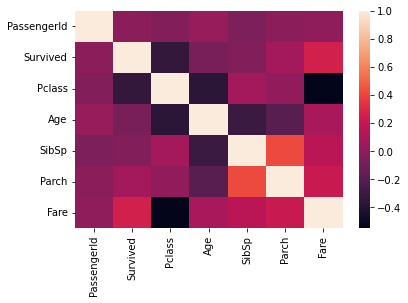

In [52]:
sns.heatmap(data.corr())

<AxesSubplot:>

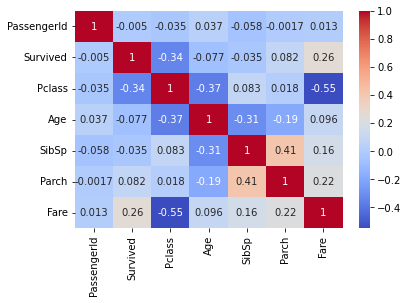

In [54]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [55]:
pv=data.pivot_table(values="Age",index="Sex",columns="Survived")

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

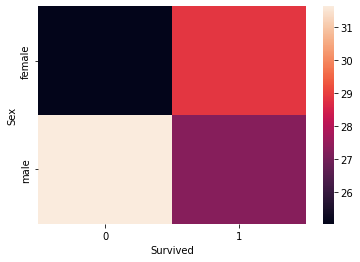

In [56]:
sns.heatmap(pv)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

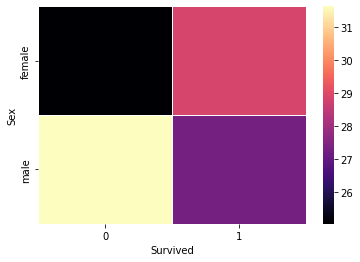

In [57]:
sns.heatmap(pv,cmap="magma",linecolor='white',linewidth=1)

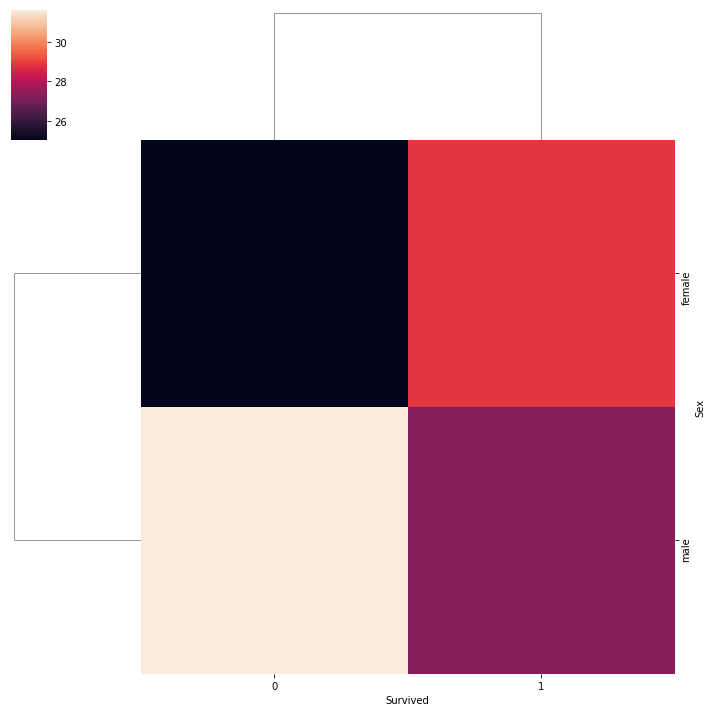

In [58]:
sns.clustermap(pv)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


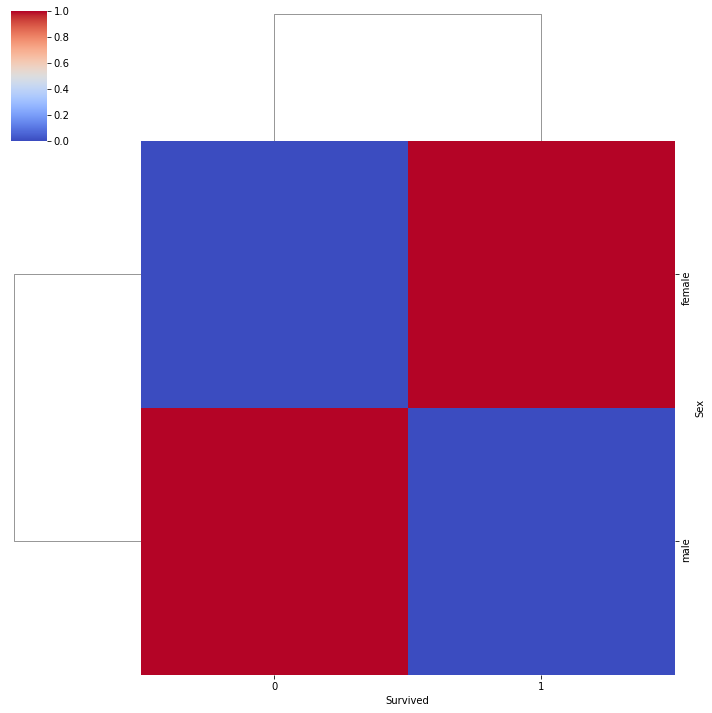

In [59]:
sns.clustermap(pv,cmap="coolwarm",standard_scale=1)